In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import numpy as np
import pickle

# Measuring mean and variance for times in Local DNS

In [33]:
dns_times = []
hops = []
time = 0
count = 0
with open('../../data/dns_resolution_time_hops.txt', 'r') as file,\
    open('../../data/dns_hops_time.txt', 'w') as out_file:
    for line in file.readlines():
        if '@' in line:
            if time > 0 and time < 600:
                out_file.write(str(time)+' '+str(count)+'\n')
                dns_times.append(time)
                hops.append(count)
            time = 0
            count = 0
        else:
            count += 1
            try:
                time += int(line.split(' ')[-2])
            except ValueError as e:
                time = 0
                count = 0
    out_file.write(str(time)+' '+str(count)+'\n')
    dns_times.append(time)
    hops.append(count)
dns_times, hops = zip(*sorted(zip(dns_times, hops)))
mean = np.mean(dns_times)
std = np.std(dns_times)
print('Mean: %.2f ms\tVar: %.2f ms\tMedian: %.2f ms' % (mean, std, dns_times[len(dns_times)//2]))
print('Max: %.2f ms\tMin: %.2f ms' % (max(dns_times), min(dns_times)))

Mean: 147.17 ms	Var: 104.84 ms	Median: 124.00 ms
Max: 595.00 ms	Min: 1.00 ms


# Plots

Generated plots for the time taken and the histogram of the times vs number of sites

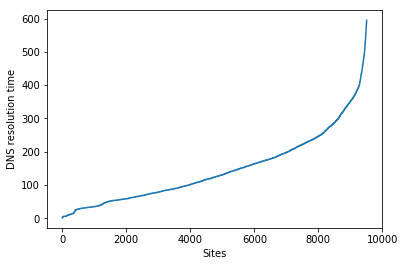

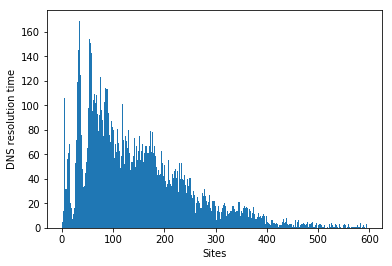

In [36]:
plt.plot(dns_times)
plt.xlabel('Sites')
plt.ylabel('DNS resolution time')
plt.show()

plt.hist(dns_times, int(max(dns_times))//2)

plt.xlabel('Sites')
plt.ylabel('DNS resolution time')
plt.show()

# Using kernel density

Generating a distribution similar to the above seen distribution based on the assumption that it takes this much time to get a dns record from over a network randomly.

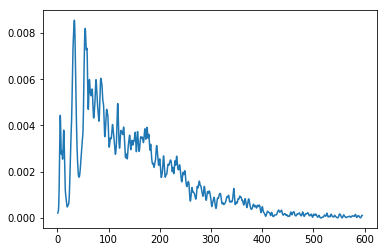

In [38]:
# arr, _, _ = plt.hist(X, int(max(dns_times))//2, normed=True)
X_plot = np.linspace(min(dns_times), max(dns_times), len(dns_times))[:, np.newaxis]
X = np.array(dns_times)[:, np.newaxis]
# for kernel in ['epanechnikov', 'tophat', 'gaussian']:
kernel = 'gaussian'
kde = KernelDensity(kernel=kernel, bandwidth=1).fit(X)
log_dens = kde.score_samples(X_plot)
plt.plot(X_plot[:, 0], np.exp(log_dens), '-',
        label="kernel = '{0}'".format(kernel))
plt.show()

with open(r"kernel_density_model.pickle", "wb") as output_file:
    pickle.dump(kde, output_file)

# Usage docs:

Import the following packages:
```python
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import numpy as np
import pickle
```

Use the following to load the pickle object and generate samples:
```python
with open(r"kernel_density_model.pickle", "rb") as input_file:
     kde = pickle.load(input_file)
```

and to generate samples:
```python
n = 1
time = kde.sample(n) #the time is in milliseconds
time.sleep(time[0]/1000)
```



# Verification of the estimator

Verifying whether the estimator works correctly by generating randomly 1000 samples

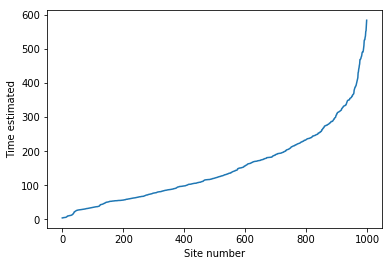

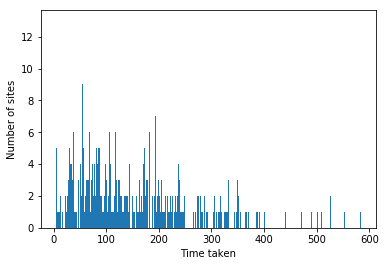

In [2]:
with open(r"kernel_density_model.pickle", "rb") as input_file:
     kde_loaded = pickle.load(input_file)

sample_arr = kde_loaded.sample(1000)
plt.figure()
plt.plot(sorted(sample_arr))
plt.xlabel('Site number')
plt.ylabel('Time estimated')
plt.figure()
plt.hist(sample_arr, 1000)
plt.xlabel('Time taken')
plt.ylabel('Number of sites')
plt.show()